* Look at drifer particle comparison and explore wind factor between model and obs.

In [1]:
%matplotlib inline
from matplotlib import pylab,dates
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.io
import datetime as dt
import matplotlib.cm as cm
import pytz, datetime
import glob
import os
import urllib2
import csv
import cStringIO
import requests
from xml.etree import cElementTree as ElementTree
import pandas as pd
import arrow
from IPython.core.display import Image

from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools

from __future__ import division

* Oct8 drop1

In [2]:
lon112={};lat112={}
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['new']=o112.variables['traj_lon']
lat112['new']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop1/\
12/ariane_trajectories_qualitative.nc','r')
lon112['old']=o112.variables['traj_lon']
lat112['old']=o112.variables['traj_lat']

In [2]:
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10/drop1/\
ariane_trajectories_qualitative.nc')
lon112=o112.variables['traj_lon']
lat112=o112.variables['traj_lat']

* Oct8 drop2

In [3]:
lon212={}; lat212={}
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['new']=o212.variables['traj_lon']
lat212['new']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop2/\
12/ariane_trajectories_qualitative.nc','r')
lon212['old']=o212.variables['traj_lon']
lat212['old']=o212.variables['traj_lat']

In [57]:
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212=o212.variables['traj_lon']
lat212=o212.variables['traj_lat']

In [2]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

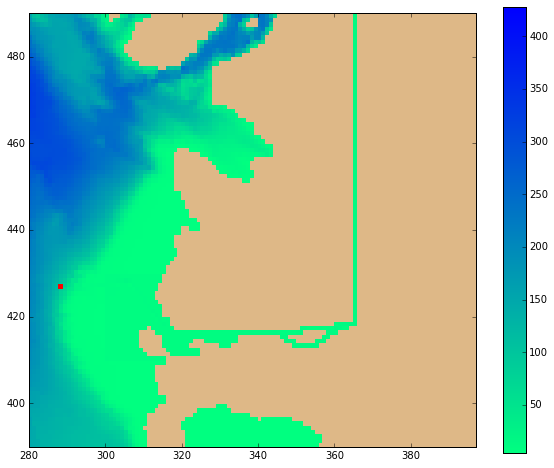

In [3]:
# Bathymetry (Close-Up)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
plt.axis((280, 397, 390, 490))

ax.scatter(288,427,color='red',marker='s')

In [4]:
tracersT = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8-10hindcast/SalishSea_1h_20141008_20141010_grid_T.nc')
nc_tools.show_variables(tracersT)
ssh = tracersT.variables['sossheig']
timesteps = tracersT.variables['time_counter']
nc_tools.timestamp(tracersT, 0)

[u'deptht', u'nav_lat', u'nav_lon', u'rain_rate', u'snow_rate', u'sossheig', u'time_counter', u'time_counter_bnds', u'vosaline', u'votemper']


<Arrow [2014-10-08T00:30:00+00:00]>

In [5]:
def plotoct(lon,lat,part,start,end,start_d,end_d,day,hour,minute,duration):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
    viz_tools.plot_coastline(ax1,grid,coords='map')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=4,color='FireBrick')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=20,color='OrangeRed')
    ax1.set_xlim([-123.6,-123])
    ax1.set_ylim([48.8,49.4])
    ax1.scatter(lon[1:,part],lat[1:,part],color='DodgerBlue',marker='o',label='Model')
    ax1.scatter(lon[0,part],lat[0,part],color='0.30',marker='s')
    ax1.plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
    ax1.legend(loc='upper left')
    
    ax2.plot(timesteps[0:48],ssh[0:48,466,329],'-k')
    
    ax2.set_xticklabels([])
    ax2.set_ylabel('Water level (m)')
    ax2.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax2.set_title('sossheig, ~Point Atkinson')
        
    t=hour
    ax2.plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')
    
    t2=hour+duration
    ax2.plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    
    [wind_speed,wind_dir,temp,time, lat, lon] = stormtools.get_EC_observations('Sandheads',start,end)
    
    fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
    ax3.plot(time,wind_speed,'-k')
    ax3.set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    ax3.set_xticklabels([])
    ax3.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax3.set_ylabel('Wind Speed (m/s)')
    ax3.set_title('Sandheads')
    
    diff = 24 - hour
    hour2 = duration - diff
    if hour2 > 0:
        day = day
        day2 = day + 1
        hour2 = hour2
    else:
        day = day
        day2 = day
        hour2 = hour+duration
    
    t=dt.datetime(2014,10,day,hour,minute)
    ax3.plot([t,t],[0,10],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    ax3.plot([tt,tt],[0,10],'b-',label='end')
    ax3.legend(loc='upper left')

    ax4.plot(time,wind_dir,'-k')
    ax4.set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    ax4.set_xticklabels([])
    ax4.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax4.set_ylabel('Wind Direction (deg CCW of E)')
    ax4.set_title('Sandheads')
    

    t=dt.datetime(2014,10,day,hour,minute)
    ax4.plot([t,t],[0,350],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    ax4.plot([tt,tt],[0,350],'b-',label='end')
    ax4.legend(loc='upper left')

In [6]:
def plotoct_mewold(lon,lat,part,start,end,start_d,end_d,day,hour,minute,duration):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
    viz_tools.plot_coastline(ax1,grid,coords='map')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=4,color='FireBrick')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=20,color='OrangeRed')
    ax1.set_xlim([-123.6,-123])
    ax1.set_ylim([48.8,49.4])
    colors=['g','DodgerBlue']
    for i, key in enumerate(lon.keys()):
        ax1.scatter(lon[key][1:,part],lat[key][1:,part],marker='o',color=colors[i],label=key)
        ax1.scatter(lon[key][0,part],lat[key][0,part],color='0.30',marker='s')
    ax1.plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
    ax1.legend(loc='upper left')
    
    ax2.plot(timesteps[0:48],ssh[0:48,466,329],'-k')
    
    ax2.set_xticklabels([])
    ax2.set_ylabel('Water level (m)')
    ax2.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax2.set_title('sossheig, ~Point Atkinson')
        
    t=hour
    ax2.plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')
    
    t2=hour+duration
    ax2.plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    
    [wind_speed,wind_dir,temp,time, lat, lon] = stormtools.get_EC_observations('Sandheads',start,end)
    
    fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
    ax3.plot(time,wind_speed,'-k')
    ax3.set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    ax3.set_xticklabels([])
    ax3.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax3.set_ylabel('Wind Speed (m/s)')
    ax3.set_title('Sandheads')
    
    diff = 24 - hour
    hour2 = duration - diff
    day2 = day +1
    
    t=dt.datetime(2014,10,day,hour,minute)
    ax3.plot([t,t],[0,10],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    ax3.plot([tt,tt],[0,10],'b-',label='end')
    ax3.legend(loc='upper left')

    ax4.plot(time,wind_dir,'-k')
    ax4.set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    ax4.set_xticklabels([])
    ax4.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax4.set_ylabel('Wind Direction (deg CCW of E)')
    ax4.set_title('Sandheads')
    

    t=dt.datetime(2014,10,day,hour,minute)
    ax4.plot([t,t],[0,350],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    ax4.plot([tt,tt],[0,350],'b-',label='end')
    ax4.legend(loc='upper left')

In [7]:
def plotoct_mewold(lon,lat,part,start,end,start_d,end_d,day,hour,minute,duration):
    fig, axs = plt.subplots(2, 2, figsize=(11, 10))
    viz_tools.plot_coastline(axs[0,0],grid,coords='map')
    viz_tools.plot_coastline(axs[0,0],grid,coords='map',isobath=4,color='FireBrick')
    viz_tools.plot_coastline(axs[0,0],grid,coords='map',isobath=20,color='OrangeRed')
    axs[0,0].set_xlim([-123.6,-123])
    axs[0,0].set_ylim([48.8,49.4])
    colors=['g','DodgerBlue']
    for i, key in enumerate(lon.keys()):
        axs[0,0].scatter(lon[key][1:,part],lat[key][1:,part],marker='o',color=colors[i],label=key)
        axs[0,0].scatter(lon[key][0,part],lat[key][0,part],color='0.30',marker='s')
    axs[0,0].plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
    axs[0,0].legend(loc='upper left')
    
    axs[0,1].plot(timesteps[0:48],ssh[0:48,466,329],'-k')
    
    axs[0,1].set_xticklabels([])
    axs[0,1].set_ylabel('Water level (m)')
    axs[0,1].set_xlabel('Oct 8 - Oct 9 (hrs)')
    axs[0,1].set_title('sossheig, ~Point Atkinson')
        
    t=hour
    axs[0,1].plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')
    
    t2=hour+duration
    axs[0,1].plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    
    [wind_speed,wind_dir,temp,time, lat, lon] = stormtools.get_EC_observations('Sandheads',start,end)
    
    #fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
    axs[1,0].plot(time,wind_speed,'-k')
    axs[1,0].set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    axs[1,0].set_xticklabels([])
    axs[1,0].set_xlabel('Oct 8 - Oct 9 (hrs)')
    axs[1,0].set_ylabel('Wind Speed (m/s)')
    axs[1,0].set_title('Sandheads')
    
    diff = 24 - hour
    hour2 = duration - diff
    day2 = day +1
    
    t=dt.datetime(2014,10,day,hour,minute)
    axs[1,0].plot([t,t],[0,10],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    axs[1,0].plot([tt,tt],[0,10],'b-',label='end')
    axs[1,0].legend(loc='upper left')

    axs[1,1].plot(time,wind_dir,'-k')
    axs[1,1].set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    axs[1,1].set_xticklabels([])
    axs[1,1].set_xlabel('Oct 8 - Oct 9 (hrs)')
    axs[1,1].set_ylabel('Wind Direction (deg CCW of E)')
    axs[1,1].set_title('Sandheads')
    

    t=dt.datetime(2014,10,day,hour,minute)
    axs[1,1].plot([t,t],[0,350],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    axs[1,1].plot([tt,tt],[0,350],'b-',label='end')
    axs[1,1].legend(loc='upper left')
    return fig

* Drop 1

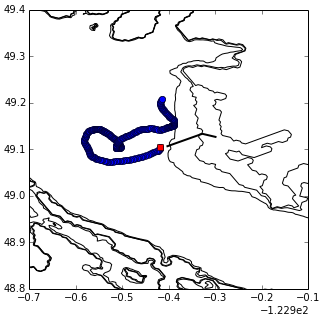

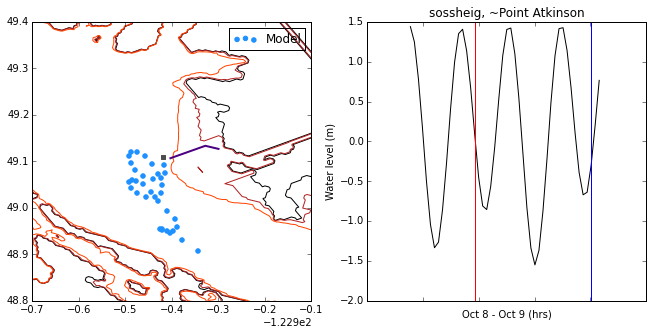

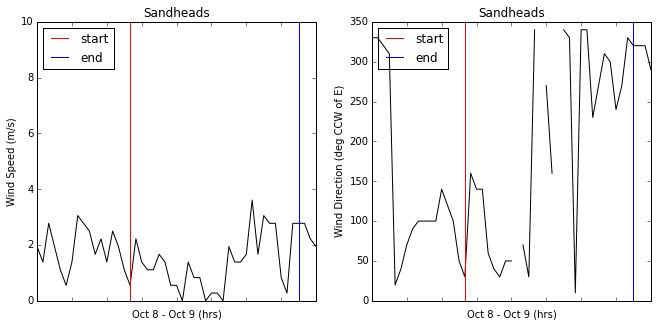

In [8]:
plotoct(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop112a.png')

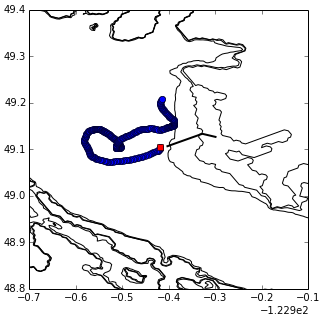

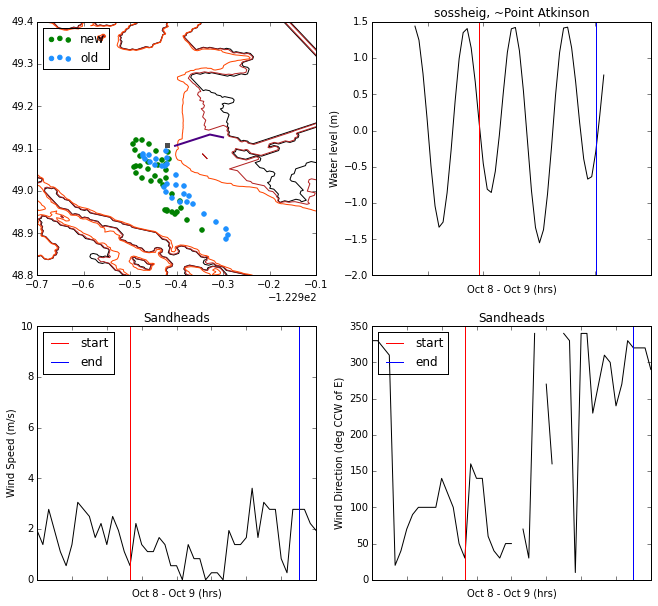

In [26]:
fig=plotoct_mewold(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop112a.png')

In [27]:
fig.savefig('drop1.png')

* Drop 2

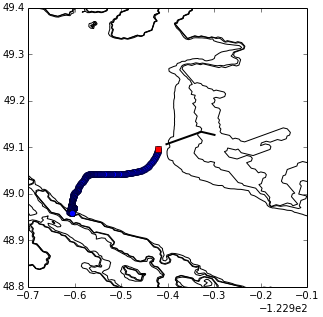

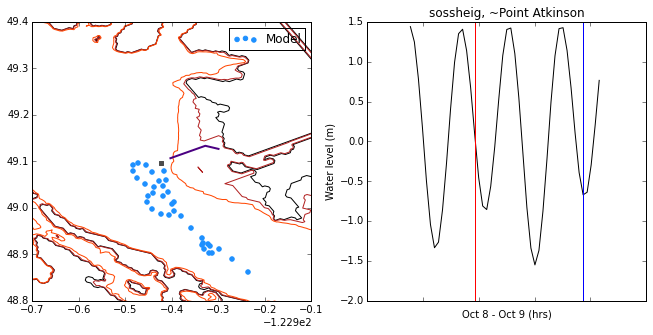

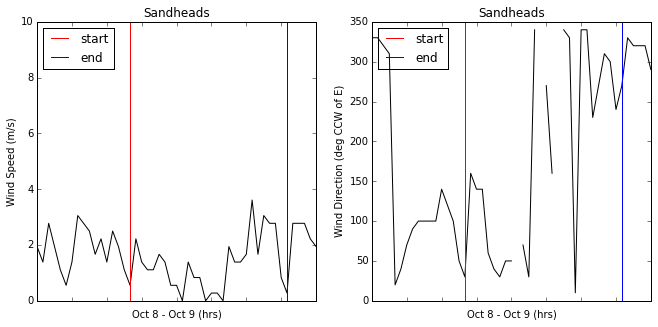

In [9]:
## use results from unsmoothed bathymetry6 and climatology river runoff
plotoct(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,27)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop212a.png')

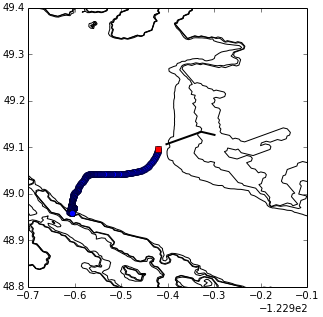

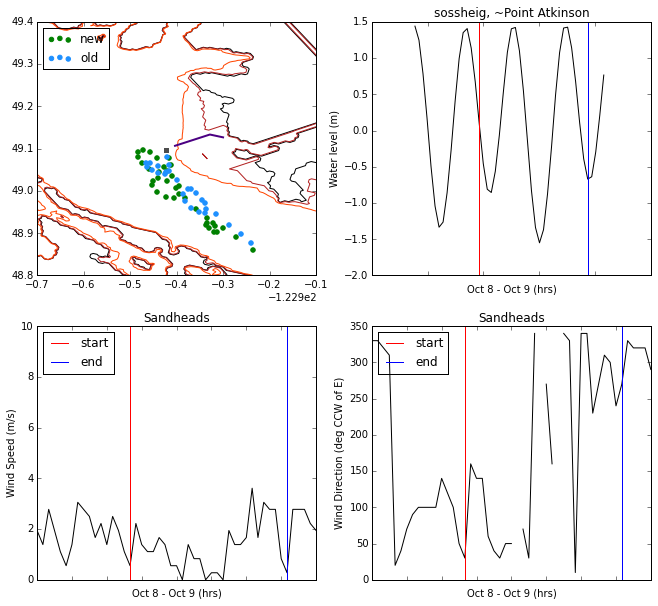

In [28]:
fig = plotoct_mewold(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,27)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop212a.png')

In [29]:
fig.savefig('drop2.png')

#  Compare the observation wind at Sandheads with model wind.

In [8]:
OP = nc.Dataset('/ocean/sallen/allen/research/Meopar/Operational/ops_y2014m10d08.nc')
OPlon =OP.variables['nav_lon'][:]-360
OPlat = OP.variables['nav_lat'][:]
nc_tools.show_variables(OP)

[u'atmpres', u'nav_lat', u'nav_lon', u'precip', u'qair', u'solar', u'tair', u'therm_rad', u'time_counter', u'u_wind', u'v_wind', u'x', u'y']


* EC observations at Sandheads

In [9]:
wind_speed = {}; wind_dir = {}; time = {}; lat={}; lon={}; press={}; temp={}; therm={};
solar={}; precip={}; qair={}

start = '1-Oct-2014'; end = '9-Oct-2014';
start2 = '9-Oct-2014'; end2 = '9-Oct-2014';

stations = ['Sandheads']

for key in stations:
    [wind_speed[key],wind_dir[key],temp[key],time[key], 
     lat[key], lon[key]] = stormtools.get_EC_observations(key,start,end)
    [ws,wd,T,t, la, lo] = stormtools.get_EC_observations(key,start2,end2)
    wind_speed[key]=np.append(wind_speed[key],ws)
    wind_dir[key]=np.append(wind_dir[key],wd)
    time[key]=np.append(time[key],t)
    temp[key]=np.append(temp[key],T)

In [10]:
def find_model_point(lon,lat,X,Y):
        # Tolerance for searching for grid points
    # (approx. distances between adjacent grid points)
    tol1 = 0.015 # lon
    tol2 = 0.015# lat

    # Search for a grid point with lon/lat within tolerance of
    # measured location
    x1, y1 = np.where(
        np.logical_and(
            (np.logical_and(X > lon-tol1, X < lon+tol1)),
            (np.logical_and(Y > lat-tol2, Y < lat+tol2))))
    return x1[0], y1[0]

* Operation model wind

In [11]:
filesOP = glob.glob('/ocean/sallen/allen/research/Meopar/Operational/ops_y2014m10d0*.nc')
filesOP.sort(key=os.path.basename)

In [12]:
def compile_OP(j,i):
    wind=[]; direc=[]; t=[]; pr=[]; sol=[]; the=[]; pre=[]; tem=[]; qr=[];
    for f in filesOP:
        G = nc.Dataset(f)
        u = G.variables['u_wind'][0:24,j,i]; v=G.variables['v_wind'][0:24,j,i];
        pr.append(G.variables['atmpres'][0:24,j,i]); sol.append(G.variables['solar'][0:24,j,i]); 
        qr.append(G.variables['qair'][0:24,j,i]); the.append(G.variables['therm_rad'][0:24,j,i]); 
        pre.append(G.variables['precip'][0:24,j,i]); tem.append(G.variables['tair'][0:24,j,i])
        speed = np.sqrt(u**2 + v**2)
        wind.append(speed)
        
        d = np.arctan2(v, u)
        d = np.rad2deg(d + (d<0)*2*np.pi);
        direc.append(d)
        
        ts=G.variables['time_counter']
        torig = datetime.datetime(1970,1,1) #there is no time_origin attriubte in OP files, so I hard coded this
        for ind in np.arange(24):
            t.append((torig + datetime.timedelta(seconds=ts[ind])))
    
    wind = np.array(wind).reshape(len(filesOP)*24,)
    direc = np.array(direc,'double').reshape(len(filesOP)*24,)
    t = np.array(t).reshape(len(filesOP)*24,)
    pr= np.array(pr).reshape(len(filesOP)*24,)
    tem = np.array(tem).reshape(len(filesOP)*24,)
    sol = np.array(sol).reshape(len(filesOP)*24,)
    the = np.array(the).reshape(len(filesOP)*24,)
    qr = np.array(qr).reshape(len(filesOP)*24,)
    pre = np.array(pre).reshape(len(filesOP)*24,)
    
    return wind, direc, t, pr, tem, sol, the, qr, pre

In [13]:
stationsOP =['Sandheads_OP']

for (obs, modOP) in zip(stations,stationsOP):    
    [j,i]=find_model_point(lon[obs],lat[obs],OPlon,OPlat)
    lon[modOP] = OPlon[j,i]
    lat[modOP]=OPlat[j,i]

    [wind_speed[modOP],wind_dir[modOP],time[modOP],
     press[modOP],temp[modOP],solar[modOP],
     therm[modOP],qair[modOP],precip[modOP]] = compile_OP(j,i)

* Plot

In [14]:
def compare_winds(duration,key1,key2,sax,eax,day,hour,minute):
    #compare wind speed and direction for data indicated by key1 and key2
    #time limits on axis given by sax,eax, label the duration range of 
    #drifter and particle floats.
    
    diff = 24 - hour
    hour2 = duration - diff
    day2 = day +1
    
    fig,axs = plt.subplots(2,1,figsize=(20,8))

    for key in [key1,key2]:
        ax=axs[0]
        ax.plot(time[key],wind_speed[key],label=key)
        ax.set_title('Wind speed')
        ax.set_xlim([sax,eax])
        ax.legend(loc=0)
        ax.set_ylabel('wind speed (m/s)')        
    
        ax=axs[1]
        ax.plot(time[key],wind_dir[key],label=key)
        ax.set_title('Wind direction')
        ax.set_xlim([sax,eax])
        ax.legend(loc=0)
        ax.set_ylabel('wind direction (degrees CCW from East)')
    ax=axs[0]
    t =dt.datetime(2014, 10, day, hour, minute)
    ax.plot([t,t],[0,10],'r-',label='start')
    tt=dt.datetime(2014,10, day2, hour2, minute)
    ax.plot([tt,tt],[0,10],'y-',label='end')
    ax.legend(loc=0)
    
    ax=axs[1]
    t =dt.datetime(2014, 10, day, hour, minute)
    ax.plot([t,t],[0,400],'r-',label='start')
    tt=dt.datetime(2014,10, day2, hour2, minute)
    ax.plot([tt,tt],[0,400],'y-',label='end')
    ax.legend(loc=0)
    
    fig,ax = plt.subplots(1,1,figsize=(5,6))
    for key in [key1,key2]:
        ax.plot(lon[key],lat[key],'o',label=key)
        viz_tools.plot_coastline(ax,grid,coords='map')
        ax.legend(loc=0)
        
    return ax

* Sandheads

(49, 50)

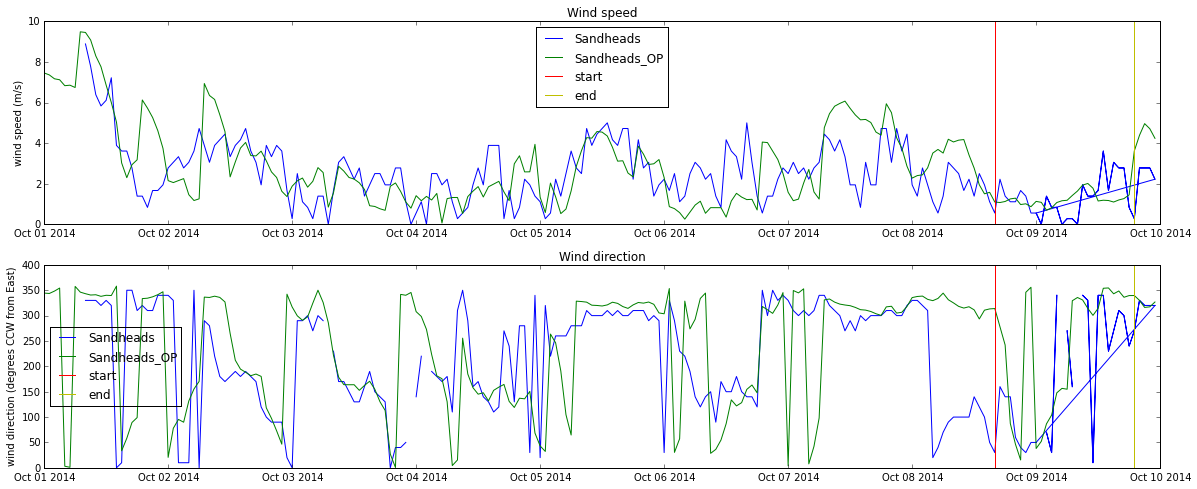

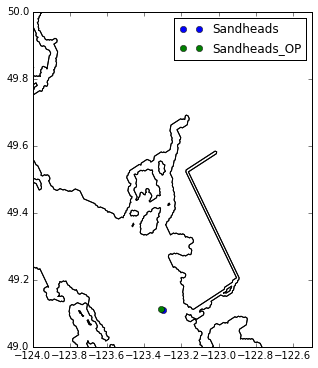

In [15]:
endd = '10-Oct-2014';
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

ax =compare_winds(27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)
ax.set_xlim([-124,-122.5])
ax.set_ylim([49,50])

* Direction of wind between model and observation has much difference from Oct 8-10, in the model, it blows to southeast while in the observations it is northwest in Oct 8 to early hours on Oct 9. I guess this explains part of the discrepency of drifter/particle trajectories.

* The other thing we noticed is that at the beginning, trajectories of drifter and particle are of much difference, so we are thinking if this big discrepency scenario can be changed to some level when we released the particle during its duration period. Below is the attempt of this! 

In [16]:
drifters = scipy.io.loadmat('/ocean/mhalvers/research/drifters/SoG_drifters.mat',squeeze_me=True)
ubc = drifters['ubc']

In [17]:
def convert_time(matlab_time_array):
    "converts a matlab time array to python format"
    python_time_array=[]
    for t in matlab_time_array:
        python_datetime = dt.datetime.fromordinal(int(t)) + dt.timedelta(days=t%1) - dt.timedelta(days = 366)
        python_time_array.append(python_datetime)
    
    python_time_array = np.array(python_time_array)
    return python_time_array

In [18]:
def get_tracks(switch,lats,lons,ptime,in_water):
    """returns a list of tracks of each buoy, ie a trajectory for
    each time the buoy was released into the water"""
    all_tracks=[]
    for ind in switch:
        track_on = 1
        i = ind
        track ={'time':[], 'lat':[],'lon':[]}
        while(track_on):
            if in_water[i]!=1:
                track_on=0
            elif i==np.shape(in_water)[0]-1:    
                track['time'].append(ptime[i])
                track['lat'].append(lats[i])
                track['lon'].append(lons[i])
                track_on=0
            else:
                track['time'].append(ptime[i])
                track['lat'].append(lats[i])
                track['lon'].append(lons[i])
            i=i+1
        all_tracks.append(track)
        
    return all_tracks

In [19]:
def organize_info(buoy,btype):
    """ organizes the buoy info. Groups the buoy data into tracks for 
        when it was released into the water. """
    #creat arrays for easier access
    buoy_name = btype[buoy][0]
    lats = btype[buoy]['lat'].flatten()
    lons = btype[buoy]['lon'].flatten()
    mtime = btype[buoy]['mtime']
    in_water = btype[buoy]['isSub'].flatten()
    #convert mtime to python datetimes
    ptime = convert_time(mtime)
    
    #loop through in_water flag to find when buoy switched from being out of water to being in water. 
    switch = []; 
    for ind in np.arange(1,in_water.shape[0]):
        if int(in_water[ind]) != int(in_water[ind-1]):
            if int(in_water[ind])==1:
                switch.append(ind)
    
    all_tracks=get_tracks(switch,lats,lons,ptime.flatten(),in_water)
    
    return buoy_name, all_tracks

In [20]:
def print_info(buoy,btype):
    """ prints the release time, lat, lon, and duration of a buoy track"""
    name, tracks=organize_info(buoy,btype)
    print name
    print 'Release times, positions and duration in hours'
    for t in tracks:
        print t['time'][0], t['lat'][0], t['lon'][0],\
        (t['time'][-1]-t['time'][0]).total_seconds()/3600

In [21]:
def find_start(tracks, start_date):
    """returns the a list of indices for a track released on start date.
    Only checks the month and day of the start day"""
    i=0
    ind=[]
    starttimes=[]
    for t in tracks:   
        if int(t['time'][0].month) == start_date.month:
                if int(t['time'][0].day) == start_date.day:
                    ind.append(i)
        i=i+1
        
    return ind

In [22]:
def plot_buoy_random(ax, tracks, startdate, day, hour,durationn,i=0, fancy=False):
    """ plots a buoy trajectory at the given startdate in an axis, ax.
    returns the trajectory that was plotted.
    The first track released on the startdate is plotted.
    For trajectories that were released mulitples times a day, i selects which release is plotted.
    """
    ind =find_start(tracks,startdate)
    traj=tracks[ind[i]]
    duration = (traj['time'][-1]-traj['time'][0]).total_seconds()/3600
    random_time = dt.datetime(2014, 10, day, hour)
    lonn = []
    latt = []

    print 'Released', traj['time'][0], 'at', traj['lat'][0], ',' , traj['lon'][0], 'for' , duration, 'hours'
    ax1.plot(traj['lon'],traj['lat'],'ob')
    ax1.plot(traj['lon'][0],traj['lat'][0],'sr')
    for ii in np.arange(len(traj['time'])):
        if dt.timedelta(hours=0)<(traj['time'][ii] - random_time) < dt.timedelta(hours = 1):
            ax1.plot(traj['lon'][ii], traj['lat'][ii], '*r')
            lonn.append(traj['lon'][ii])
            latt.append(traj['lat'][ii])
            print (traj['time'][ii], traj['lon'][ii], traj['lat'][ii])
    
    [j,i]=tidetools.find_closest_model_point(float(traj['lon'][0]),float(traj['lat'][0]),X,Y,bathy)
    ax1.plot(-123-np.array([18.2, 13.7, 12])/60.,49+np.array([6.4, 8, 7.6])/60.,'-k',lw=2); 
    [jjj, iii] = tidetools.find_closest_model_point(float(lonn[0]),float(latt[0]),X,Y,bathy)
    if fancy:
        cmap = plt.get_cmap('winter_r')
        cmap.set_bad('burlywood')
        ax1.pcolormesh(X, Y, bathy, cmap=cmap)
        ax1.set_title('Observed Drift Track')
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.text(-123.15,49.13, "Fraser River", fontsize=12)
    else:
        viz_tools.plot_coastline(ax1, grid, coords='map')
        viz_tools.plot_coastline(ax1, grid, coords='map',isobath=4)
        viz_tools.plot_coastline(ax1, grid, coords='map',isobath=20)
        print 'NEMO coords:', j,i
        print 'Random lat & lon in NEMO coords:', jjj, iii
        
        
    ax2.plot(timesteps[0:48],ssh[0:48,466,329],'-k')
    
    ax2.set_xticklabels([])
    ax2.set_ylabel('Water level (m)')
    ax2.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax2.set_title('sossheig, ~Point Atkinson')
        
    t=hour
    ax2.plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')
    
    t2=hour+durationn
    ax2.plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    
    return traj

* For drop1

Released 2014-10-08 16:10:07.000003 at 49.1054983333 , -123.319833333 for 28.7502777783 hours
(datetime.datetime(2014, 10, 8, 20, 0, 8), -123.42781333333333, 49.073536666666669)
(datetime.datetime(2014, 10, 8, 20, 5, 8, 2), -123.43077166666667, 49.073390000000003)
(datetime.datetime(2014, 10, 8, 20, 10, 8, 5), -123.43371833333333, 49.073743333333333)
(datetime.datetime(2014, 10, 8, 20, 15, 7, 999997), -123.43585, 49.074458333333332)
(datetime.datetime(2014, 10, 8, 20, 20, 7, 999999), -123.43820833333334, 49.074956666666665)
(datetime.datetime(2014, 10, 8, 20, 25, 8, 1), -123.44068333333334, 49.075768333333336)
(datetime.datetime(2014, 10, 8, 20, 30, 8, 4), -123.44348666666667, 49.076378333333331)
(datetime.datetime(2014, 10, 8, 20, 35, 7, 999996), -123.44640833333334, 49.077011666666664)
(datetime.datetime(2014, 10, 8, 20, 40, 7, 999998), -123.44923, 49.077536666666667)
(datetime.datetime(2014, 10, 8, 20, 45, 8), -123.45206333333333, 49.078236666666669)
(datetime.datetime(2014, 10, 8, 

(48.8, 49.4)

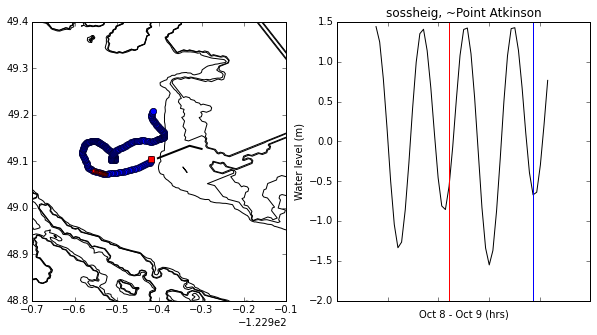

In [23]:
buoy = 2
name, tracks=organize_info(buoy,ubc)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
traj = plot_buoy_random(ax, tracks, dt.datetime(2014,10,8), 8,20, 23,i=-1, fancy=False)
ax1.set_xlim([-123.6,-123])
ax1.set_ylim([48.8,49.4])

In [26]:
fig.savefig('oct8-20amdrop112a.png')

* For drop2

Released 2014-10-08 16:05:07.999996 at 49.0956433333 , -123.320643333 for 26.4997222228 hours
(datetime.datetime(2014, 10, 8, 20, 0, 6, 999996), -123.39701166666667, 49.042296666666665)
(datetime.datetime(2014, 10, 8, 20, 5, 6, 999998), -123.39926333333334, 49.042053333333335)
(datetime.datetime(2014, 10, 8, 20, 10, 7), -123.40145333333334, 49.041928333333331)
(datetime.datetime(2014, 10, 8, 20, 15, 7, 2), -123.40378666666666, 49.041771666666669)
(datetime.datetime(2014, 10, 8, 20, 20, 7, 5), -123.40631666666667, 49.04179666666667)
(datetime.datetime(2014, 10, 8, 20, 25, 6, 999997), -123.40898333333334, 49.041756666666664)
(datetime.datetime(2014, 10, 8, 20, 30, 6, 999999), -123.41160000000001, 49.041611666666668)
(datetime.datetime(2014, 10, 8, 20, 35, 7, 1), -123.41426333333334, 49.041611666666668)
(datetime.datetime(2014, 10, 8, 20, 40, 7, 3), -123.41684666666667, 49.041646666666665)
(datetime.datetime(2014, 10, 8, 20, 45, 6, 999996), -123.41921833333333, 49.041640000000001)
(dateti

(48.8, 49.4)

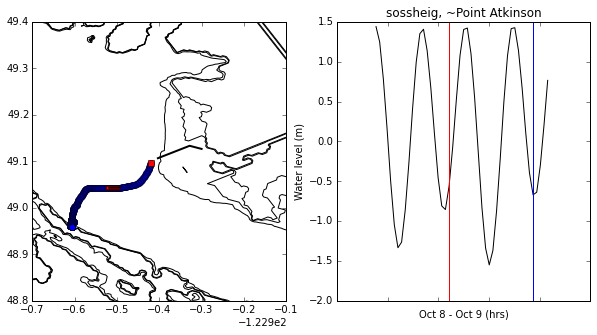

In [24]:
buoy = 1
name, tracks=organize_info(buoy,ubc)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
traj = plot_buoy_random(ax, tracks, dt.datetime(2014,10,8), 8,20,23,i=-1, fancy=False)
ax1.set_xlim([-123.6,-123])
ax1.set_ylim([48.8,49.4])

In [28]:
fig.savefig('oct8-20amdrop212a.png')

* For Ariane particle trajectores released from random time

* Drop1

In [25]:
o112_20am = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/20am/\
ariane_trajectories_qualitative.nc')
lon112_20am = o112_20am.variables['traj_lon']
lat112_20am = o112_20am.variables['traj_lat']

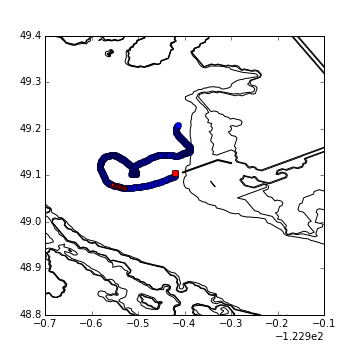

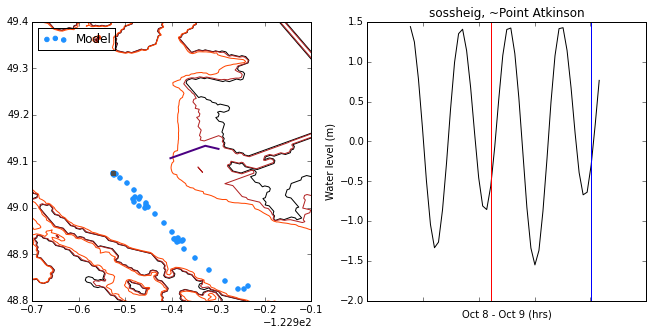

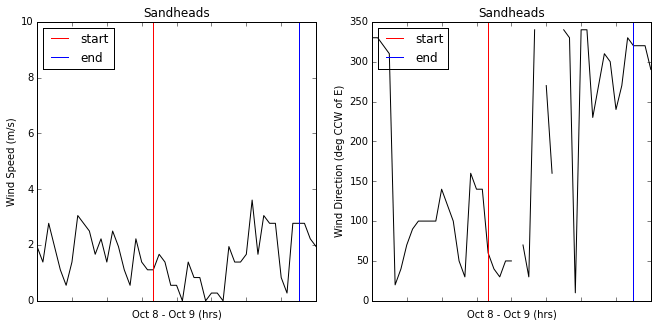

In [26]:
plotoct(lon112_20am,lat112_20am,0,'7-Oct-2014','11-Oct-2014',8,10,8,20,0,25)
Image(filename='/ocean/jieliu/research/meopar/surface current/oct8-20amdrop112a.png')

* Drop2

In [27]:
o212_20am = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop2/\
20am/ariane_trajectories_qualitative.nc','r')
lon212_20am = o212_20am.variables['traj_lon']
lat212_20am = o212_20am.variables['traj_lat']

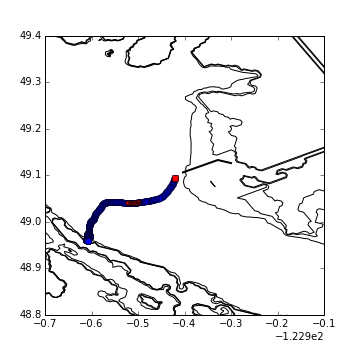

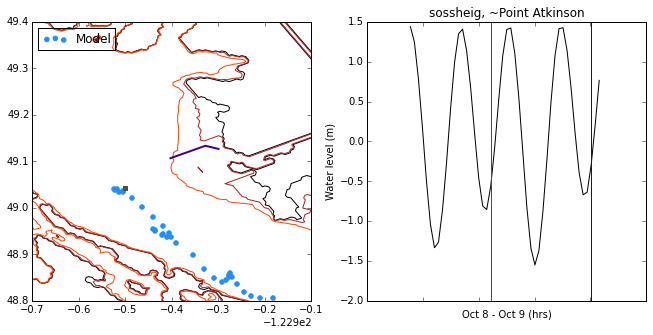

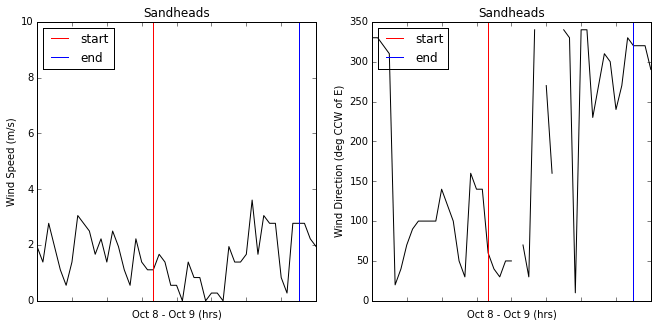

In [28]:
plotoct(lon212_20am,lat212_20am,0,'7-Oct-2014','11-Oct-2014',8,10,8,20,0,25)
Image(filename='/ocean/jieliu/research/meopar/surface current/oct8-20amdrop212a.png')

* But accidentally, as it shows below, at the same initial position, if particle start 4 hours later, say, start at 20 rather than 16, its trajectory trend is similar with drifters, does it mean we have a time shift in the model?

* Drop1

In [29]:
o112_same_ini = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo\
/drop1/same_position_20am\
/ariane_trajectories_qualitative.nc')
lon112_same_ini = o112_same_ini.variables['traj_lon']
lat112_same_ini = o112_same_ini.variables['traj_lat']

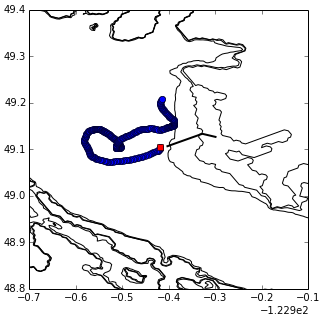

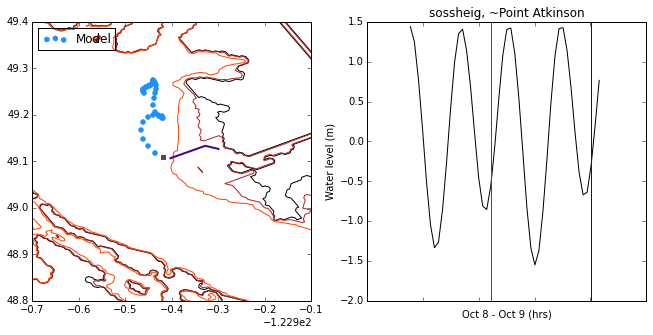

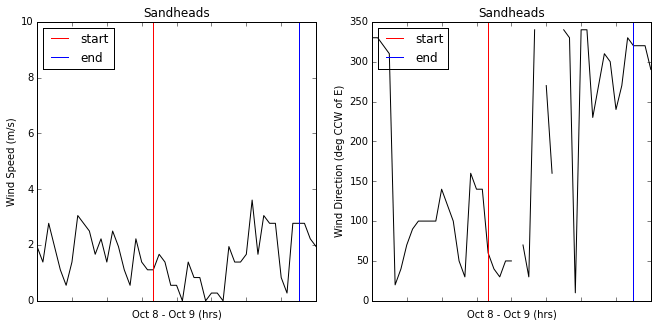

In [30]:
plotoct(lon112_same_ini,lat112_same_ini,0,'7-Oct-2014','11-Oct-2014',8,10,8,20,0,25)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop112a.png')

* Drop2

In [31]:
o212_same_ini = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo\
/drop2/same_position_20am\
/ariane_trajectories_qualitative.nc','r')
lon212_same_ini = o212_same_ini.variables['traj_lon']
lat212_same_ini = o212_same_ini.variables['traj_lat']

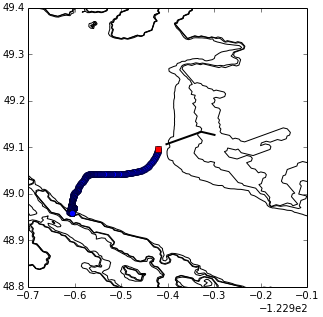

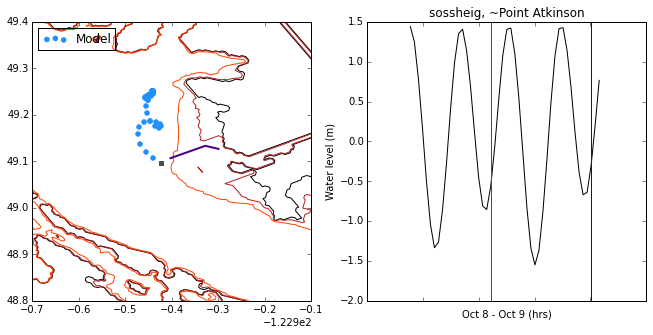

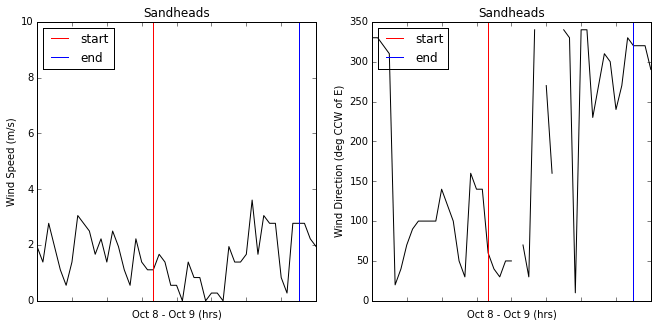

In [32]:
plotoct(lon212_same_ini,lat212_same_ini,0,'7-Oct-2014','11-Oct-2014',8,10,8,20,0,25)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop212a.png')

* If we select random time from when the observed wind has little discrepency with modelled wind and see if the trajectories could be similar?

* For drop1

Released 2014-10-08 16:10:07.000003 at 49.1054983333 , -123.319833333 for 28.7502777783 hours
(datetime.datetime(2014, 10, 9, 10, 0, 8, 4), -123.41091166666666, 49.115056666666668)
(datetime.datetime(2014, 10, 9, 10, 5, 9), -123.41023, 49.115665)
(datetime.datetime(2014, 10, 9, 10, 10, 7, 999998), -123.40955833333334, 49.116711666666667)
(datetime.datetime(2014, 10, 9, 10, 15, 8), -123.40881333333333, 49.117651666666667)
(datetime.datetime(2014, 10, 9, 10, 20, 8, 2), -123.40791666666667, 49.118643333333331)
(datetime.datetime(2014, 10, 9, 10, 25, 8, 5), -123.40687166666666, 49.119661666666666)
(datetime.datetime(2014, 10, 9, 10, 30, 7, 999997), -123.40577500000001, 49.120683333333332)
(datetime.datetime(2014, 10, 9, 10, 35, 7, 999999), -123.40465333333333, 49.121743333333335)
(datetime.datetime(2014, 10, 9, 10, 40, 8, 1), -123.40357166666666, 49.122683333333335)
(datetime.datetime(2014, 10, 9, 10, 45, 8, 4), -123.40195333333334, 49.123558333333335)
(datetime.datetime(2014, 10, 9, 10, 5

(48.8, 49.4)

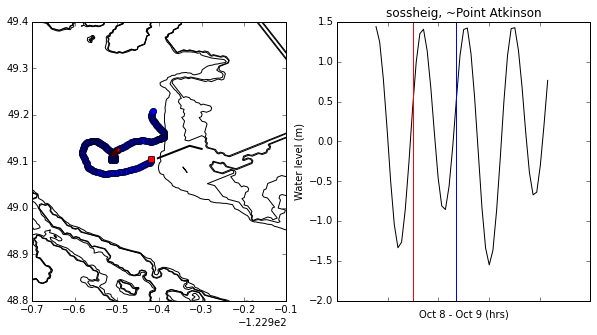

In [33]:
buoy = 2
name, tracks=organize_info(buoy,ubc)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
traj = plot_buoy_random(ax, tracks, dt.datetime(2014,10,8), 9,10, 12,i=-1, fancy=False)
ax1.set_xlim([-123.6,-123])
ax1.set_ylim([48.8,49.4])

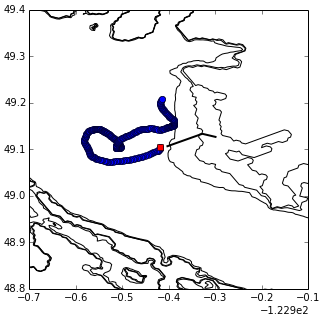

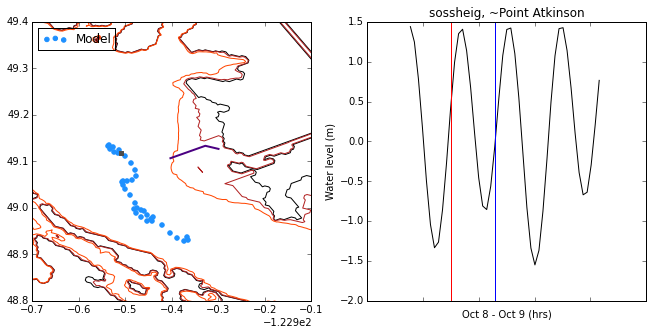

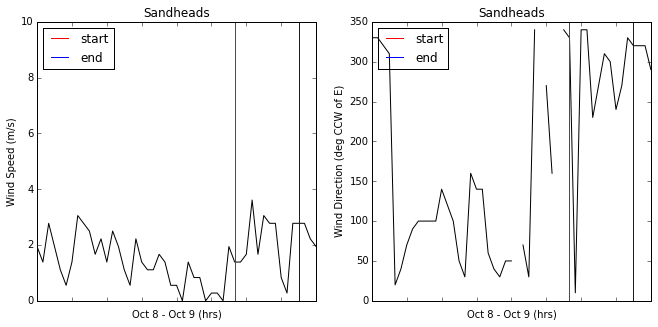

In [34]:
o112_same_wind = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/wind_same/\
ariane_trajectories_qualitative.nc')
lon112_same_wind = o112_same_wind.variables['traj_lon']
lat112_same_wind = o112_same_wind.variables['traj_lat']
plotoct(lon112_same_wind,lat112_same_wind,0,'7-Oct-2014','11-Oct-2014',8,10,9,10,0,11)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop112a.png')

* For drop2

Released 2014-10-08 16:05:07.999996 at 49.0956433333 , -123.320643333 for 26.4997222228 hours
(datetime.datetime(2014, 10, 9, 10, 0, 8, 4), -123.50682999999999, 48.969110000000001)
(datetime.datetime(2014, 10, 9, 10, 5, 7, 999996), -123.50691166666667, 48.969011666666667)
(datetime.datetime(2014, 10, 9, 10, 10, 7, 999998), -123.50711166666666, 48.968771666666669)
(datetime.datetime(2014, 10, 9, 10, 15, 8), -123.50731666666667, 48.968503333333331)
(datetime.datetime(2014, 10, 9, 10, 20, 8, 2), -123.507355, 48.968268333333334)
(datetime.datetime(2014, 10, 9, 10, 25, 8, 5), -123.50745833333333, 48.968003333333336)
(datetime.datetime(2014, 10, 9, 10, 30, 7, 999997), -123.50765333333334, 48.96781166666667)
(datetime.datetime(2014, 10, 9, 10, 35, 7, 999999), -123.50788666666666, 48.967664999999997)
(datetime.datetime(2014, 10, 9, 10, 40, 8, 1), -123.50805, 48.96754)
(datetime.datetime(2014, 10, 9, 10, 45, 8, 4), -123.50807166666667, 48.967481666666664)
(datetime.datetime(2014, 10, 9, 10, 50,

(48.8, 49.4)

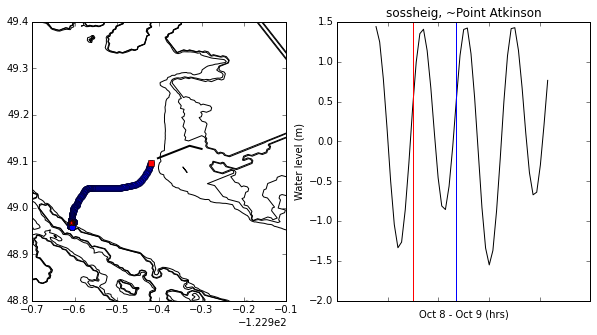

In [35]:
buoy = 1
name, tracks=organize_info(buoy,ubc)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
traj = plot_buoy_random(ax, tracks, dt.datetime(2014,10,8), 9,10, 12,i=-1, fancy=False)
ax1.set_xlim([-123.6,-123])
ax1.set_ylim([48.8,49.4])

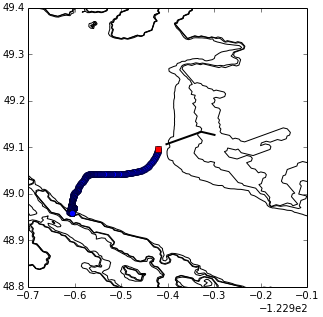

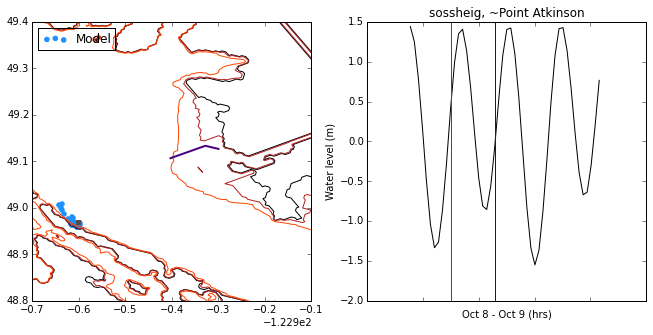

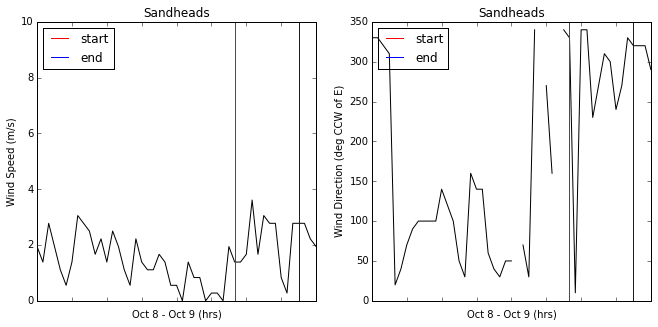

In [36]:
o212_same_wind = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo\
/drop2/wind_same/\
/ariane_trajectories_qualitative.nc','r')
lon212_same_wind = o212_same_wind.variables['traj_lon']
lat212_same_wind = o212_same_wind.variables['traj_lat']
plotoct(lon212_same_wind,lat212_same_wind,0,'7-Oct-2014','11-Oct-2014',8,10,9,10,0,11)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop212a.png')

* It is hard to tell from this above wind_same drifter-particle comparison when it is during flood tide, but from drop1 we can see that the particle still goes south despite of flood tide, does it mean there is something with the tides in the model?? 

# Trajectory comparison with smoothed bathymetry6 and daily runoff

* This hindcast is from Sep 25 to Oct 10 with smoothed bathymetry 6 and daily Fraser runoff at Hope.

* Oct 8 drop1

In [37]:
lon112={};lat112={}
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['new']=o112.variables['traj_lon']
lat112['new']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop1/\
12/ariane_trajectories_qualitative.nc','r')
lon112['old']=o112.variables['traj_lon']
lat112['old']=o112.variables['traj_lat']

* Oct 8 drop2

In [39]:
lon212={}; lat212={}
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['new']=o212.variables['traj_lon']
lat212['new']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop2/\
12/ariane_trajectories_qualitative.nc','r')
lon212['old']=o212.variables['traj_lon']
lat212['old']=o212.variables['traj_lat']

* Drop1 comparison

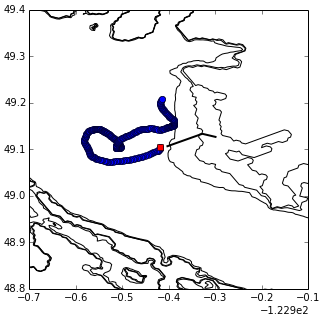

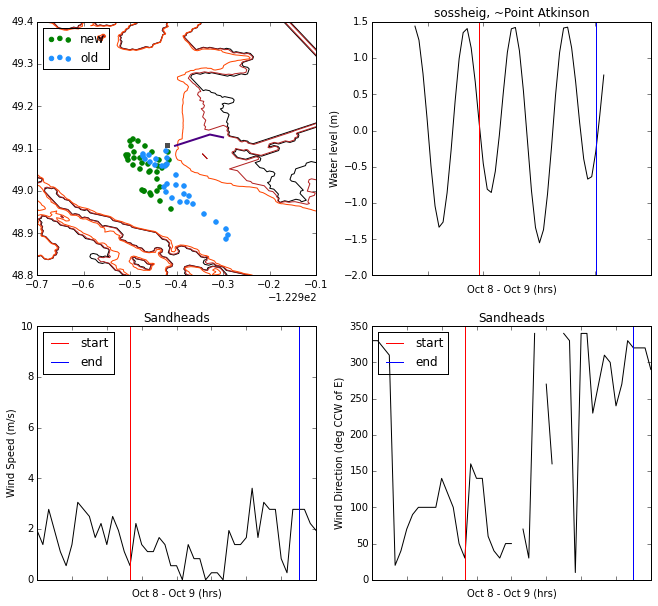

In [38]:
fig=plotoct_mewold(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop112a.png')

In [13]:
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/\
ariane_trajectories_qualitative.nc')
lon112=o112.variables['traj_lon']
lat112=o112.variables['traj_lat']

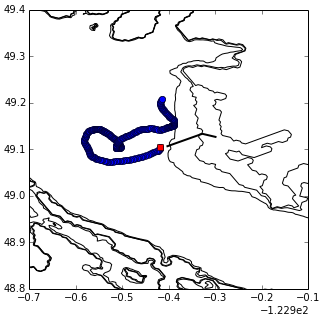

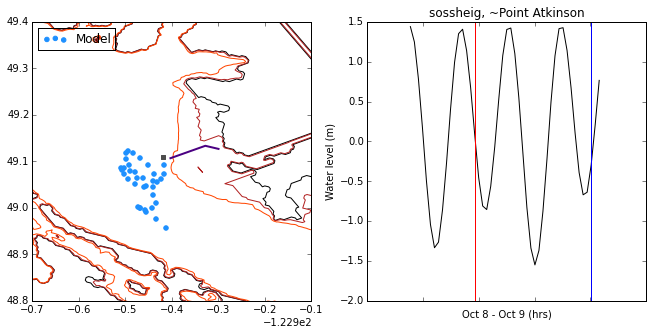

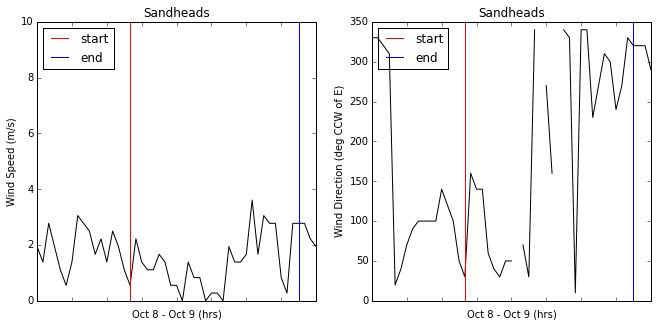

In [14]:
plotoct(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop112a.png')

* Drop2 comparison

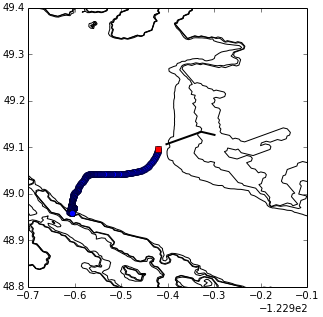

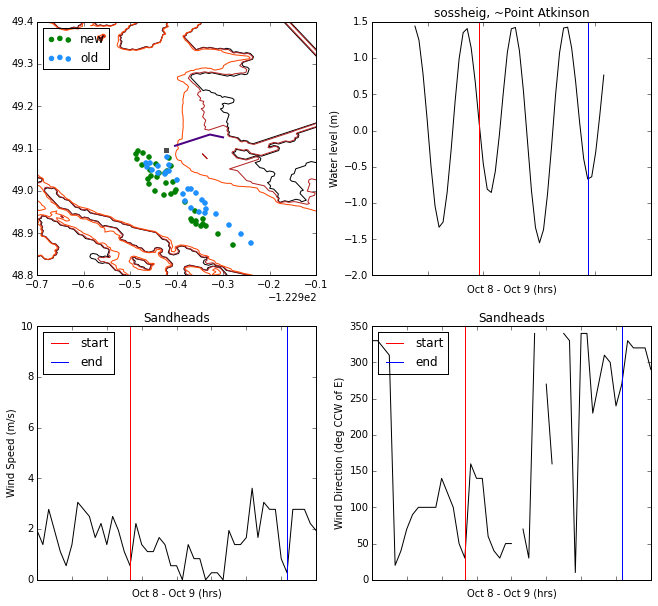

In [40]:
fig = plotoct_mewold(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,27)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop212a.png')

In [16]:
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212=o212.variables['traj_lon']
lat212=o212.variables['traj_lat']

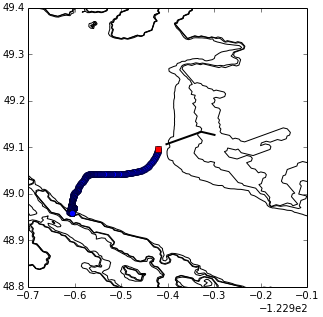

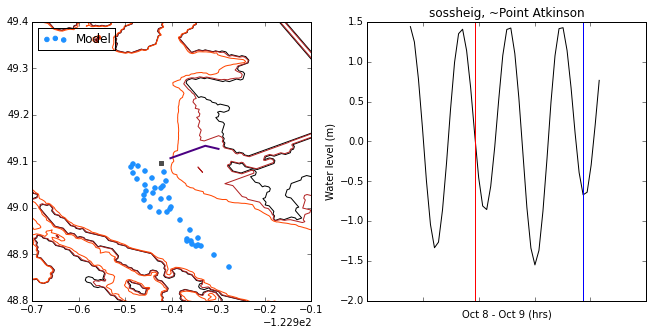

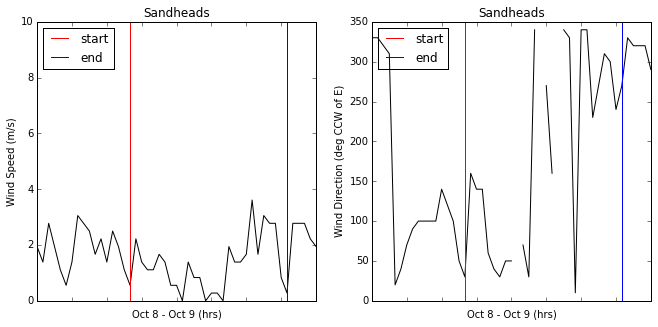

In [17]:
plotoct(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,27)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop212a.png')